# Figure 3H - Slow

(1700, 2250)


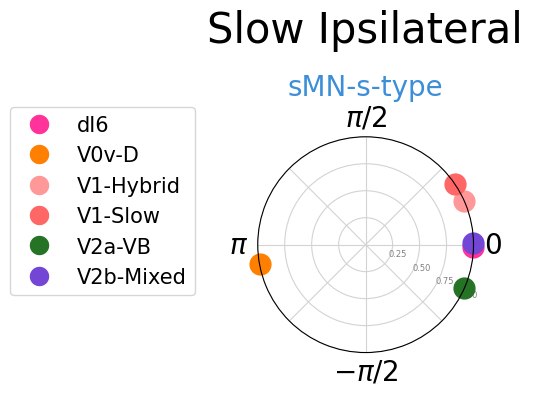

In [4]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import NETWORK_POOLS, TIME_MIN_SIF, TIME_MAX_SIF, SLOW

PDG = PhaseDelayGenerator()
PDG.lim_min = 10
PDG.lim_max = 200
PDG.fig_size = (4, 4)
raw_data = pd.read_csv("SlowScale-FullExport.csv", index_col=0)
run_mode = SLOW
somite = 5
target_pools = NETWORK_POOLS[run_mode]
source_pools = [item for item in target_pools if "MN" in item]
target_pools = [item for item in target_pools if "Muscle" not in item and "MN" not in item]

for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(raw_data, 
                                  source_pools, target_pools, 
                                  somite, somite,  
                                  run_mode, 
                                  side="Ipsi", 
                                  time_range= time_range,
                                  auto_corr= False)
    PDG.plot_polar_phase_plots(num_cols=1, legend=True)

# Figure 4F- Inter-II

(1700, 2250)


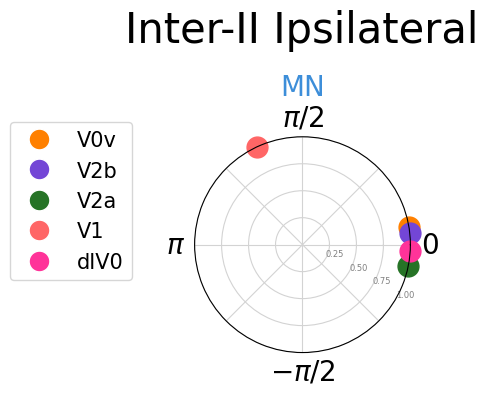

In [6]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import NETWORK_POOLS, CELL_GROUPS, TIME_MIN_SIF, TIME_MAX_SIF, INTER_II

PDG = PhaseDelayGenerator()
PDG.lim_min = 20
PDG.lim_max = 200
PDG.fig_size = (4, 4)

raw_data = pd.read_csv("SIF-FullExport.csv", index_col=0)
run_mode = INTER_II 
somite = 5

#grouped auto correlation for active populations only
data_summary = raw_data.copy()
active_pools = set(CELL_GROUPS.keys()).intersection(NETWORK_POOLS[run_mode])
active_groups = []
for cell_pool in active_pools:
    cell_group = CELL_GROUPS[cell_pool]
    active_groups.append(cell_group)
    data_summary.columns = data_summary.columns.str.replace(cell_pool, cell_group)

#Merge columns with the same name by summing up their values
data_summary = data_summary.T.groupby(data_summary.columns).sum().T
active_groups = set(active_groups)

source_pools = [item for item in active_groups if "MN" in item]
target_pools = [item for item in active_groups if "Muscle" not in item and "MN" not in item]

for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(data_summary, 
                                  source_pools, target_pools, 
                                  somite, somite,  
                                  run_mode, 
                                  side="Ipsi", 
                                  time_range= time_range,
                                  auto_corr= False)
    PDG.plot_polar_phase_plots(legend=True, num_cols=1)


# Figure 5E - Fast

(1700, 2250)


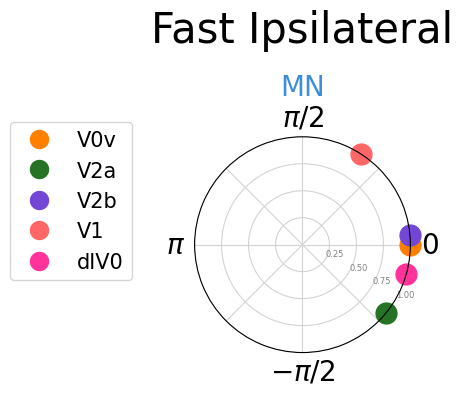

In [8]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import NETWORK_POOLS, CELL_GROUPS, TIME_MIN_SIF, TIME_MAX_SIF, FAST

PDG = PhaseDelayGenerator()
PDG.lim_min = 5
PDG.lim_max = 200
PDG.fig_size = (4, 4)

raw_data = pd.read_csv("FastScale-FullExport.csv", index_col=0)
run_mode = FAST
somite = 5

#grouped auto correlation for active populations only
data_summary = raw_data.copy()
active_pools = set(CELL_GROUPS.keys()).intersection(NETWORK_POOLS[run_mode])
active_groups = []
for cell_pool in active_pools:
    cell_group = CELL_GROUPS[cell_pool]
    active_groups.append(cell_group)
    data_summary.columns = data_summary.columns.str.replace(cell_pool, cell_group)

#Merge columns with the same name by summing up their values
data_summary = data_summary.T.groupby(data_summary.columns).sum().T
active_groups = set(active_groups)
source_pools = [item for item in active_groups if "MN" in item]
target_pools = [item for item in active_groups if "Muscle" not in item and "MN" not in item]

for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(data_summary, 
                                  source_pools, target_pools,  
                                  somite, somite,  
                                  run_mode, 
                                  side="Ipsi", 
                                  time_range= time_range,
                                  auto_corr= False)
    PDG.plot_polar_phase_plots(legend=True, num_cols=1)